In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import colormaps

In [37]:
import pandas as pd

def read_csv_to_dataframe(file_path):
    """
    Reads a comma-separated CSV file and converts it into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    df = pd.read_csv(file_path)  # assumes the file is comma-separated
    return df

In [38]:
# Ensure the function is defined (run the cell with the function definition if needed)
terminos_df = read_csv_to_dataframe(r"C:\git_RobertVZ\CursoPython\bases_datos\Terminos_lagoon_TA_DIC_2023_RawData.csv")
print(terminos_df.head())  # show first 5 rows

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7          

In [39]:
def preprocess_data(df, variables):
    """
    Standardize selected variables and return clean DataFrame.
    """
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled

In [56]:
def perform_hierarchical_clustering(X_scaled, method='single', n_clusters=4):
    """
    Perform hierarchical clustering and return cluster labels.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

In [54]:
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters.
    """
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        above_threshold_color='gray'  # Default color for links above the threshold
    )
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

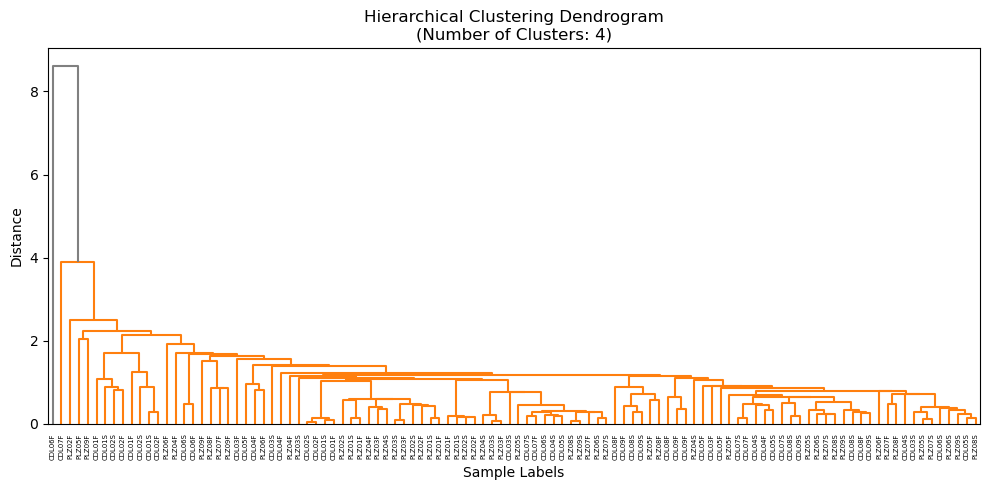

In [55]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(terminos_df, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=3)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

In [57]:
def perform_hierarchical_clustering(X_scaled, method='complete', n_clusters=4):
    """
    Perform hierarchical clustering and return cluster labels.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

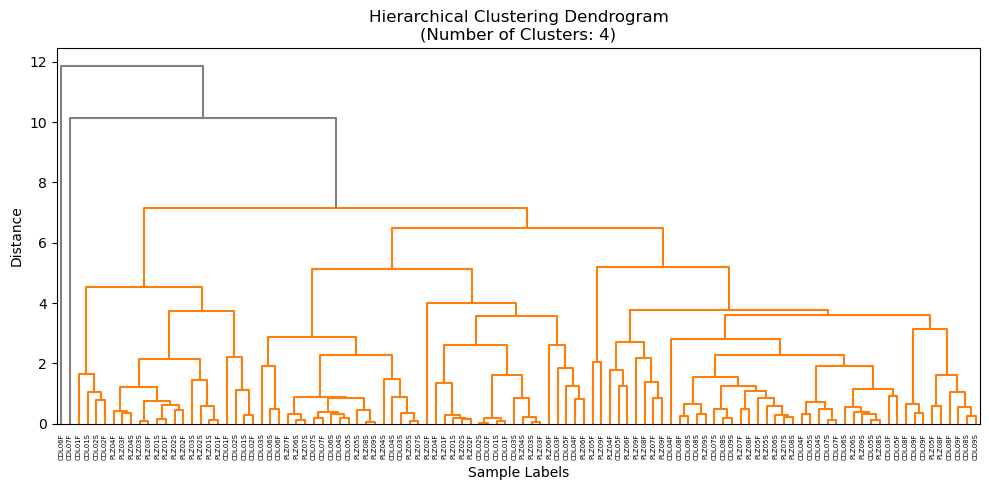

In [58]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(terminos_df, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=3)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

In [59]:
def perform_hierarchical_clustering(X_scaled, method='average', n_clusters=4):
    """
    Perform hierarchical clustering and return cluster labels.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

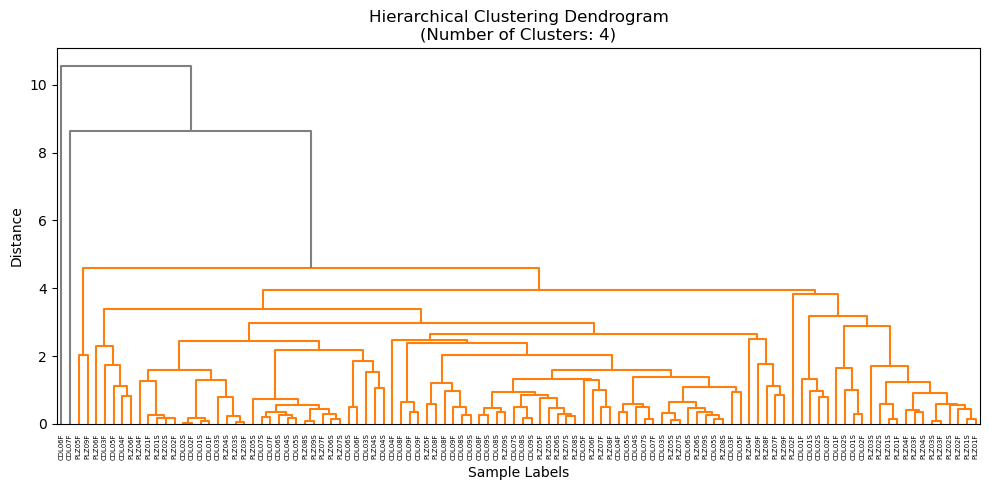

In [60]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(terminos_df, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=3)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)